In [83]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score

In [52]:
pred_mask=sorted(glob(os.path.join("prediction","aug","*")))
true_mask=sorted(glob(os.path.join("dataset","non-aug","test","masks","*")))

In [55]:
print(pred_mask[1],true_mask[1])

prediction\aug\20240620_115058_frame_10.jpg dataset\non-aug\test\masks\20240620_115058_frame_10.jpg


In [78]:
score=[]

for pred_y, true_y in tqdm(zip(pred_mask,true_mask), total=len(pred_mask)):
    name=pred_y.split("/")[-1]
    pred_y=cv2.imread(pred_y, cv2.IMREAD_GRAYSCALE)
    pred_y=pred_y/255.0
    pred_y=pred_y>0.5
    pred_y=pred_y.astype(np.int32)
    pred_y=pred_y.flatten()

    true_y=cv2.imread(true_y,cv2.IMREAD_GRAYSCALE)
    true_y=true_y/255.0
    true_y=true_y>0.5
    true_y=true_y.astype(np.int32)
    true_y=true_y.flatten()

    acc_value=accuracy_score(pred_y,true_y)
    f1_value=f1_score(pred_y,true_y, labels=[0,1],average="binary")
    recall_value=recall_score(pred_y,true_y, labels=[0,1],average="binary")
    precision_value=precision_score(pred_y,true_y, labels=[0,1],average="binary")
    score.append([name,acc_value,f1_value,recall_value,precision_value])
    


100%|██████████| 455/455 [01:33<00:00,  4.85it/s]


In [79]:
score=[s[1:] for s in score]

In [80]:
mean_score= np.mean(score,axis=0)
print(f"ACCURACY:{mean_score[0]:0.5f}")
print(f"F1:{mean_score[1]:0.5f}")
print(f"RECCALL:{mean_score[2]:0.5f}")
print(f"PRECISION:{mean_score[3]:0.5f}")

ACCURACY:0.82320
F1:0.44702
RECCALL:0.85990
PRECISION:0.31463


In [84]:
confusion_matrix = np.array([[34.57, 5.63],
                             [75.31, 339.49]])

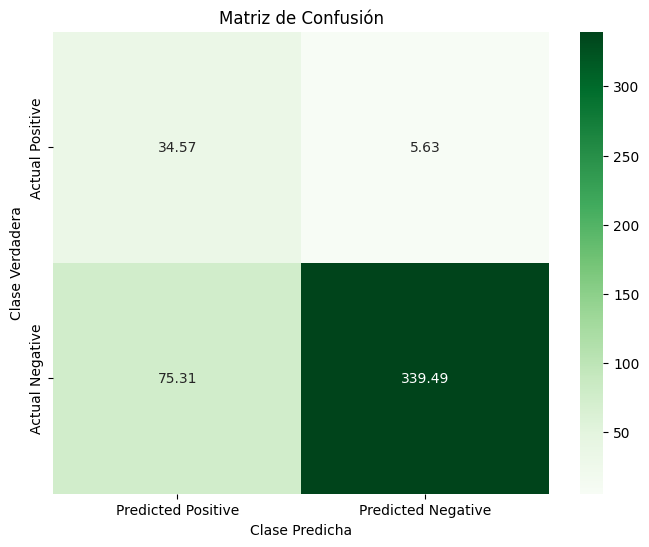

In [90]:
# Creamos un heatmap con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='Greens', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])

# Añadimos títulos y etiquetas
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()